In [1]:
#General 
import numpy as np
import pandas as pd 
import joblib
import sklearn
import xgboost as xgb
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,precision_recall_curve, average_precision_score, classification_report, confusion_matrix, make_scorer

In [2]:
print(sklearn.__version__)
print(xgb.__version__)

1.3.0
1.7.3


In [3]:
#Data Reading
classes_mixed_data = pd.read_csv('F:\Sequence Prediction/Week 1 mixed test.csv') #file is having 49 feature
Y_test = classes_mixed_data['label'] 
classes_mixed_data = classes_mixed_data.drop('label', axis='columns')

In [4]:
# file path for saved model
mixed_model_path = 'F:\\Sequence Prediction\\Final Models\\mixed_model_xgbRF.joblib'

# load the saved model from the joblib file
mixed_model_loaded = joblib.load(mixed_model_path)

In [5]:
# load the mapped file from path

#Location of mapping 
mixed_model_label_mapping_path = 'F:\\Sequence Prediction\\Final Models\\mixed_model_label_mapping.joblib'

# load the saved model from the joblib file
label_mapping = joblib.load(mixed_model_label_mapping_path)

In [6]:
# prediction
Y_encoded_pred = mixed_model_loaded.predict(classes_mixed_data)

In [7]:
# function to decode the encoded values

def decode_labels(encoded_values, label_mapping):

    decoded_values = [label_mapping[encoded] for encoded in encoded_values]

    return decoded_values


# Using the decoding function to get the decoded predictions

Y_pred_mixed = decode_labels(Y_encoded_pred, label_mapping)


In [8]:
# Evaluate the model's performance
print(classification_report(Y_test, Y_pred_mixed))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      9304
           5       1.00      1.00      1.00     13534
           6       1.00      1.00      1.00     10908
           9       1.00      1.00      1.00     12456
          10       1.00      1.00      1.00      9682
          12       1.00      1.00      1.00     13119

    accuracy                           1.00     69003
   macro avg       1.00      1.00      1.00     69003
weighted avg       1.00      1.00      1.00     69003



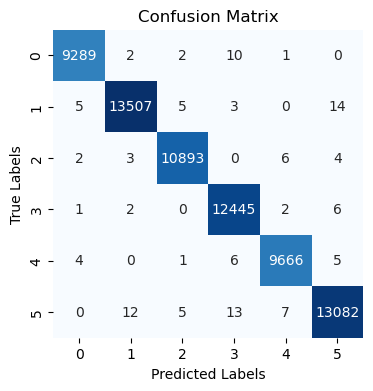

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
#compute the confusion metrix
cm = confusion_matrix(Y_test,Y_pred_mixed)

#display using heatmap
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()